In [1]:
import astropy.io.fits as fits
import numpy as np
import glob
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from astropy.visualization import simple_norm
import ccdproc as ccd
from astropy import visualization as viz
from astropy.visualization import (imshow_norm, MinMaxInterval, SqrtStretch, ZScaleInterval, ImageNormalize)
from astropy.coordinates import SkyCoord
from photutils.aperture import ApertureStats
from photutils.aperture import SkyEllipticalAperture

from astropy.stats import SigmaClip
from photutils.aperture import aperture_photometry, CircularAperture, CircularAnnulus, RectangularAperture
from photutils.detection import DAOStarFinder
from astropy.stats import mad_std
from astropy.wcs import WCS
from astropy.table import QTable
from astropy.io import ascii
import os

import numpy as np

from astropy.convolution import Gaussian2DKernel
from astropy.io import fits
from astropy.stats import gaussian_fwhm_to_sigma
from astropy.table import QTable
import astropy.units as u
from astropy.visualization import make_lupton_rgb, SqrtStretch, ImageNormalize, simple_norm
import astropy.wcs as wcs

import photutils
print('photutils', photutils.__version__)

from photutils import Background2D, MedianBackground, detect_sources, deblend_sources, SourceCatalog#, source_properties (new API)
from photutils.utils import calc_total_error

from regions import Regions


photutils 1.5.0


In [2]:
ls /home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter

jw01373-c1000_t006_nircam_clear-f360m-sub640/
jw01373-c1000_t006_nircam_f150w2-f164n-sub640/
jw01373-o006_t006_nircam_clear-f360m-sub640/
jw01373-o007_t006_nircam_f405n-f444w-sub640/
jw01373-o008_t006_nircam_clear-f212n/
jw01373-o008_t006_nircam_clear-f335m/
jw01373-o009_t006_nircam_clear-f212n/
jw01373-o009_t006_nircam_clear-f335m/


# Getting Started

- F150W2
- F212N
- F335M
- F360M
- F444W

In [3]:
data = '/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/*/*i2d.fits'#'#jw01373-o008_t006_nircam_clear-*'
#data = '/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/*/f150w2*i2d.fits'
#jw01373-o009_t006_nircam_clear-f335m/*.fits'

#*/*.fits'#'#jw01373-o008_t006_nircam_clear-*'

In [4]:
cali = '/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/*/*segm.fits'
cali_names = glob.glob(cali)
cali_names

['/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/jw01373-c1000_t006_nircam_clear-f360m-sub640/jw01373-c1000_t006_nircam_clear-f360m-sub640_segm.fits',
 '/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/jw01373-c1000_t006_nircam_f150w2-f164n-sub640/jw01373-c1000_t006_nircam_f150w2-f164n-sub640_segm.fits',
 '/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/jw01373-o006_t006_nircam_clear-f360m-sub640/jw01373-o006_t006_nircam_clear-f360m-sub640_segm.fits',
 '/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/jw01373-o007_t006_nircam_f405n-f444w-sub640/jw01373-o007_t006_nircam_f405n-f444w-sub640_segm.fits',
 '/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/jw01373-o008_t006_nircam_clear-f212n/jw01373-o008_t006_nircam_clear-f212n_segm.fits',
 '/home/savannahgramze/Documents/ObsAstronomy/Ob

In [5]:
ecs = '/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/*/*.ecsv'
ecs_names = glob.glob(ecs)
ecs_names

['/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/jw01373-c1000_t006_nircam_clear-f360m-sub640/jw01373-c1000_t006_nircam_clear-f360m-sub640_cat.ecsv',
 '/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/jw01373-c1000_t006_nircam_f150w2-f164n-sub640/jw01373-c1000_t006_nircam_f150w2-f164n-sub640_cat.ecsv',
 '/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/jw01373-o006_t006_nircam_clear-f360m-sub640/jw01373-o006_t006_nircam_clear-f360m-sub640_cat.ecsv',
 '/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/jw01373-o007_t006_nircam_f405n-f444w-sub640/jw01373-o007_t006_nircam_f405n-f444w-sub640_cat.ecsv',
 '/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/jw01373-o008_t006_nircam_clear-f212n/jw01373-o008_t006_nircam_clear-f212n_cat.ecsv',
 '/home/savannahgramze/Documents/ObsAstronomy/ObsData

In [6]:
#display_im(cali_names[0])

In [7]:
im_names = glob.glob(data)#[:1]
im_names

['/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/jw01373-c1000_t006_nircam_clear-f360m-sub640/jw01373-c1000_t006_nircam_clear-f360m-sub640_i2d.fits',
 '/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/jw01373-c1000_t006_nircam_f150w2-f164n-sub640/jw01373-c1000_t006_nircam_f150w2-f164n-sub640_i2d.fits',
 '/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/jw01373-o006_t006_nircam_clear-f360m-sub640/jw01373-o006_t006_nircam_clear-f360m-sub640_i2d.fits',
 '/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/jw01373-o007_t006_nircam_f405n-f444w-sub640/jw01373-o007_t006_nircam_f405n-f444w-sub640_i2d.fits',
 '/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/jw01373-o008_t006_nircam_clear-f212n/jw01373-o008_t006_nircam_clear-f212n_i2d.fits',
 '/home/savannahgramze/Documents/ObsAstronomy/ObsData

In [8]:
def display_im(im):
    #print(im[122:128])
    hdu = fits.open(im)
    head = hdu['SCI'].header
    dat = hdu['SCI'].data
    print(fits.getheader(im)['FILTER'])
    fig = plt.figure(figsize=(8,9))
    #dat = #fits.getdata(im)
    #head = fits.getheader(im)
    #w = WCS(head)
    #plt.subplot(projection=w)
    imshow_norm(dat, origin='lower', interval=MinMaxInterval(), stretch=viz.LogStretch(), cmap='bone')
    #plt.show()
    return fits.getheader(im)['FILTER']

In [9]:
pwd

'/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour'

F360M
Over-calibrated


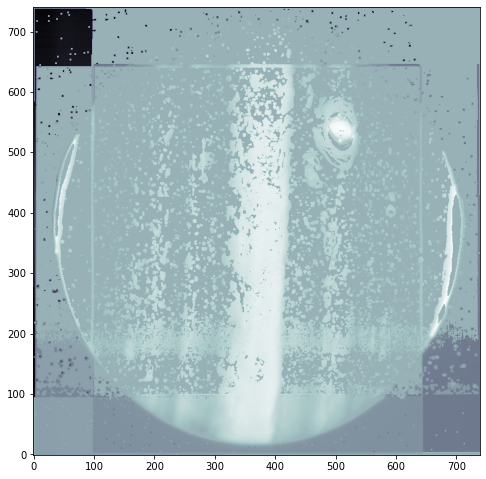

In [10]:
fil = display_im(im_names[0])
print('Over-calibrated')
# "C:\Users\panda\Documents\HomeworkBack\ObsTech\LabFour\plots"
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/'+fil+'.pdf', bbox_inches="tight")

F150W2
Over-calibrated


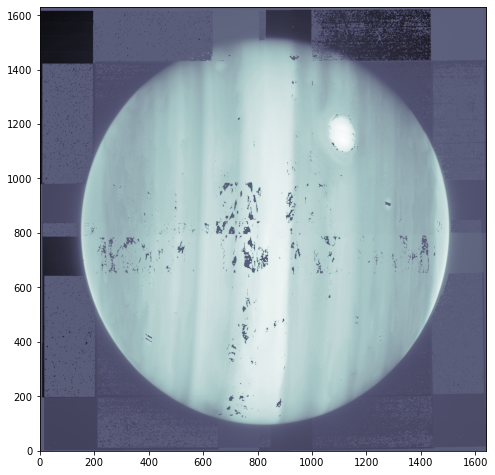

In [11]:
fil=display_im(im_names[1])
print('Over-calibrated')
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/'+fil+'.pdf', bbox_inches="tight")

F360M


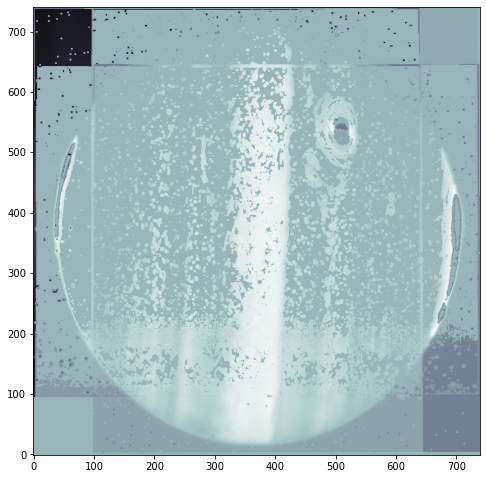

In [12]:
fil=display_im(im_names[2])
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/'+fil+'2.pdf', bbox_inches="tight")

F444W
There are odd artifacts across the surface of Jupiter here, leaving it dark and splotchy in places. Is this due to cosmic rays oversaturating the detector, or bad pixels or what?
Over-calibrated


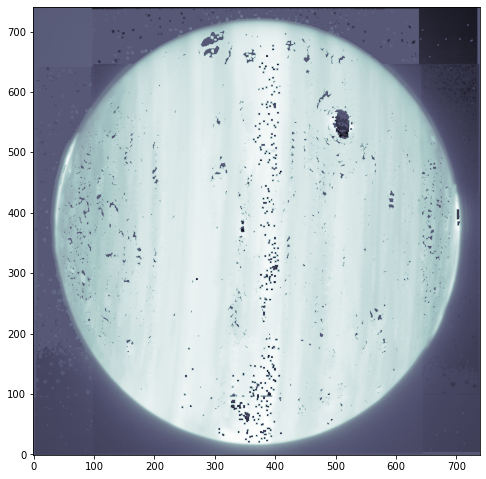

In [13]:
fil=display_im(im_names[3])
print('There are odd artifacts across the surface of Jupiter here, leaving it dark and splotchy in places. Is this due to cosmic rays oversaturating the detector, or bad pixels or what?')
print('Over-calibrated')
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/'+fil+'.pdf', bbox_inches="tight")

F212N
One of Jupiter's moons is faintly visible in this image.


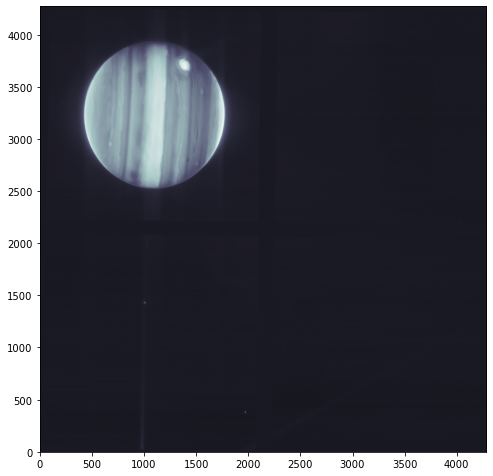

In [14]:
fil=display_im(im_names[4])
print('One of Jupiter\'s moons is faintly visible in this image.')
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/'+fil+'.pdf', bbox_inches="tight")

F335M
One of Jupiter's moons is faintly visible in this image.
The areas around its poles are oddly dark.


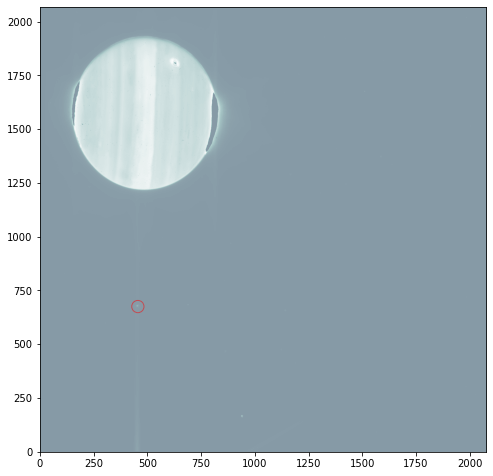

In [15]:
fil = display_im(im_names[5])
print('One of Jupiter\'s moons is faintly visible in this image.')
plt.scatter(456, 675, s=150, facecolors='none', edgecolors='r', alpha=0.5)
print('The areas around its poles are oddly dark.')
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/'+fil+'.pdf', bbox_inches="tight")

F212N


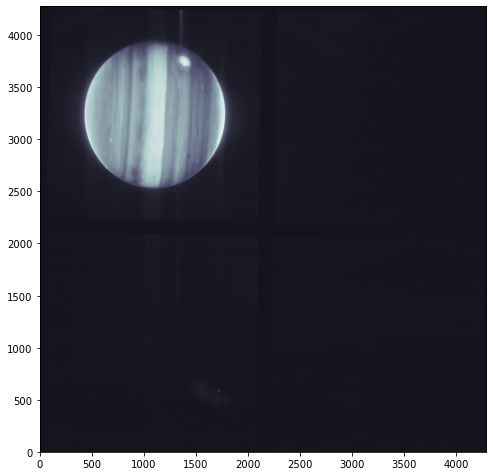

In [16]:
fil=display_im(im_names[6])
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/'+fil+'2.pdf', bbox_inches="tight")

F335M
Jupiter's rings are visible in this image. Also, there are galaxies faintly visible in the background of this image.
While this image is the closest to press release images I have seen of Jupiter from JWST, the areas around its poles are oddly dark.


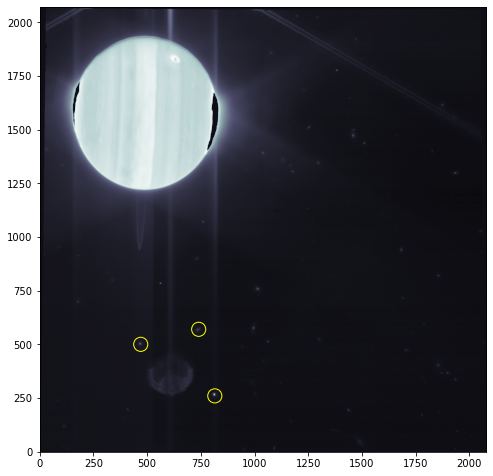

In [17]:
fil=display_im(im_names[7])
plt.scatter(815, 260, s=200, facecolors='none', edgecolors='yellow')
plt.scatter(470, 500, s=200, facecolors='none', edgecolors='yellow')
plt.scatter(740, 570, s=200, facecolors='none', edgecolors='yellow')
print('Jupiter\'s rings are visible in this image. Also, there are galaxies faintly visible in the background of this image.')
print('''While this image is the closest to press release images I have seen of Jupiter from JWST, the areas around its poles are oddly dark.''')
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/'+fil+'2.pdf', bbox_inches="tight")

## Image Cutouts

In [18]:
def display_cutout(im, x1, y1, x2, y2, vi=viz.LogStretch()):
    print(fits.getheader(im)['FILTER'])
    fig = plt.figure(figsize=(8,9))
    dat = fits.getdata(im)[y1:y2, x1:x2]
    head = fits.getheader(im)
    imshow_norm(dat, origin='lower', interval=MinMaxInterval(), stretch=vi, cmap='bone')


F335M
Background Galaxies
Galaxies are scattered everywhere in the background of the image.


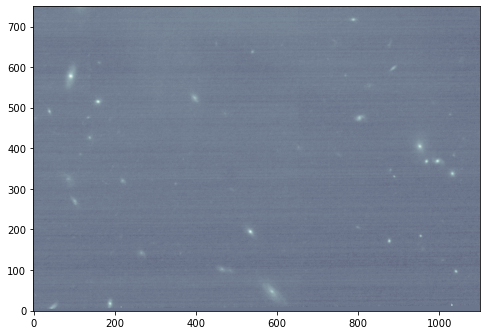

In [19]:
display_cutout(im_names[7], 900, 0, 2000, 750)#, vi=viz.HistEqStretch(fits.getdata(im_names[7])))
print('Background Galaxies')
print('Galaxies are scattered everywhere in the background of the image.')
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/galaxies.pdf', bbox_inches="tight")

F335M


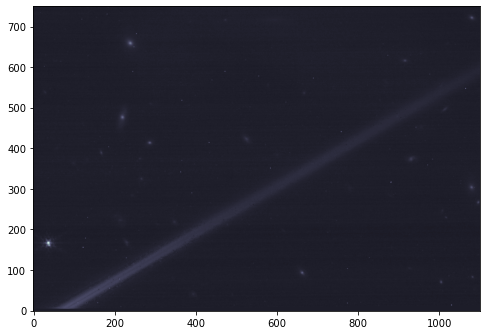

In [20]:
display_cutout(im_names[5], 900, 0, 2000, 750)
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/galaxies2.pdf', bbox_inches="tight")

F335M
Rings


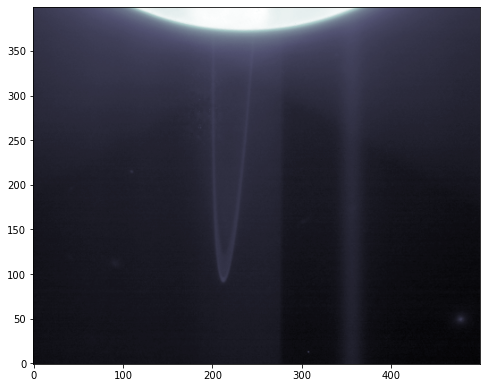

In [21]:
display_cutout(im_names[7], 250, 850, 750, 1250, vi=viz.LogStretch())
print('Rings')
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/rings.pdf', bbox_inches="tight")

F335M
Moon
Moon Pixel Coords on original image: 451 729


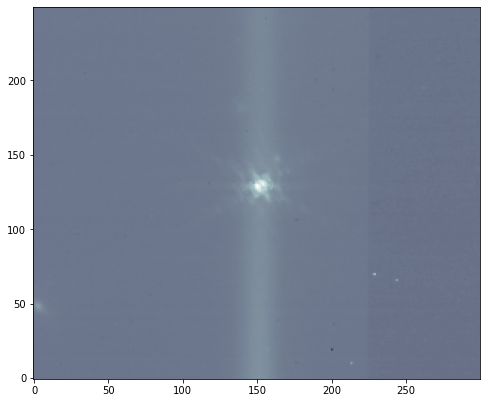

In [22]:
display_cutout(im_names[5], 300, 550, 600, 800)
print('Moon')
#plt.scatter(151, 129)
print('Moon Pixel Coords on original image:', 300+151, 600+129)
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/moon.pdf', bbox_inches="tight")

F212N
Jupiter


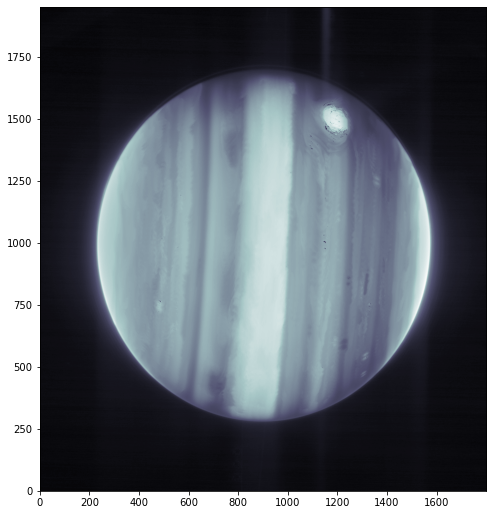

In [23]:
display_cutout(im_names[6], 200, 2250, 2000, 4200)
print('Jupiter')
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/jupiterF212N.pdf', bbox_inches="tight")

# Science Analysis

In	the	image	header,	there	will	be	diagnostic	information	about	each	of	the	images.	
Crucially,	this	includes	the	flux	calibration,	or	how	many	janskys	per	pixel	(or	per	unit	area)	
is	equivalent	to	one	count.	Note:	The	zero	point	calibration	for	JWST	has	been	updated	so	
the	value	in	the	image	header	might	not	be	as	accurate	as	we	now	know	today,	but	it	is	fine	
for	an	in-class	lab	activity! So,	let’s	make	a	broad	band	spectrum	of	Jupiter	using	the	
imaging	data!

## Spectrum of the Integrated Disk

Let’s	first	do	the	easy	thing	– pretend	that	Jupiter	is	a	point	source.	We’re	going	
to	be	doing	a	similar	thing	to	what	you	did	in	lab	2	– integrate	all	the	light	under	
Jupiter’s	disk as if	it	were	the	same	as	integrating	a	big	blob	of	a	star. Place	a	
circular	aperture	the	encloses	most	of	the	disk	of	Jupiter	(you	might	miss	some	
of	the	edges	but	this	should	have	negligible	effect).	Using	the	information	in the	
image	header	(pixel	size,	how	to	convert	from	counts	to	flux	density	in	jansky),	
sum	up	the	total	integrated	flux	in	each	image.	Obtain	the	median	wavelength	for	
each	instrument	setting	and	make	a	plot	of	Flux	vs	Wavelength	for	Jupiter.	Have	
a	horizontal	error	bar	for	each	data	point	spanning	the	width	of	the	NIRCam	
filter	used	for	each	image.	

For	this	portion,	include	an	image	of	Jupiter	with	your	chosen	aperture for	each	
of	the	images	as	well	as	your	derived	spectrum. What	do	you	notice	about	this	
spectrum,	and	how	do	you	interpret	this?

In [24]:
def get_fluxdensity(hdu):
    head = hdu[1].header
    pixar = head['PIXAR_A2']*u.arcsec**2
    #imwcs = wcs.WCS(head, hdu)
    #pixscale = wcs.utils.proj_plane_pixel_scales(imwcs)[0] 
    #pixscale *= imwcs.wcs.cunit[0].to('arcsec')
    flux_density = u.Unit(head['BUNIT'])*pixar.to(u.sr, equivalencies=u.dimensionless_angles())
    #*(pixscale*u.arcsec).to(u.sr, equivalencies=u.dimensionless_angles())
    return flux_density

F360M


(<matplotlib.patches.Rectangle at 0x7efd0b2a1190>,)

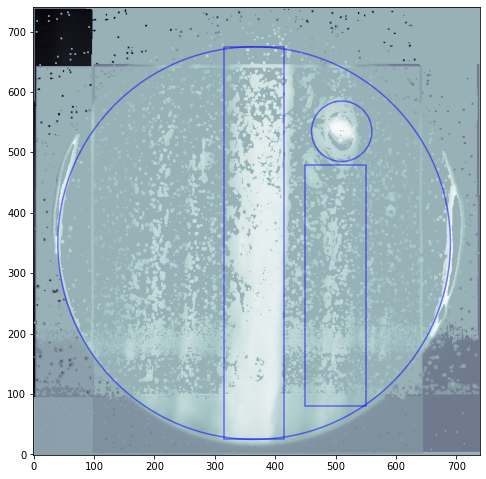

In [25]:
display_im(im_names[0])
#display_cutout(im_names[0], 200, 2250, 2000, 4200)
apertures_0 = CircularAperture((365, 350), r=325.) 
apertures_0.plot(color='blue', lw=1.5, alpha=0.5)

apertures_0_eye = CircularAperture((510, 535), r=50.)
apertures_0_eye.plot(color='blue', lw=1.5, alpha=0.5)

apertures_0_stripe = RectangularAperture((365, 350), w=100, h=650)
apertures_0_stripe.plot(color='blue', lw=1.5, alpha=0.5)

apertures_0_band = RectangularAperture((500, 280), w=100, h=400)
apertures_0_band.plot(color='blue', lw=1.5, alpha=0.5)

In [26]:
infile = im_names[0]
hdu = fits.open(infile)
data = hdu['SCI'].data#fits.getdata(infile)
imwcs = wcs.WCS(hdu[1].header, hdu)

#weight = fits.open(weightfiles[filt])[0].data

Set DATE-AVG to '2022-07-27T10:30:18.938' from MJD-AVG.
Set DATE-END to '2022-07-27T10:36:18.132' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -35.934788 from OBSGEO-[XYZ].
Set OBSGEO-H to 1713338310.257 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


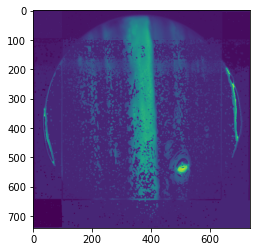

In [27]:
im0_header = hdu[0].header
#im0_header#['cdelt']
plt.imshow(hdu['SCI'].data)

In [28]:
#ny, nx = data.shape
pixscale = wcs.utils.proj_plane_pixel_scales(imwcs)[0] 
pixscale *= imwcs.wcs.cunit[0].to('arcsec')
#outline = '%d x %d pixels' % (ny, nx)
#outline += ' = %g" x %g"' % (ny * pixscale, nx * pixscale)
#outline += ' (%.2f" / pixel)' % pixscale
#print(outline)

In [29]:
#wcs.utils.proj_plane_pixel_scales(imwcs)[0]*imwcs.wcs.cunit[0].to(u.sr, equivalencies=u.dimensionless_angles())
(pixscale*u.arcsec).to(u.sr, equivalencies=u.dimensionless_angles())

<Quantity 3.05500123e-07 sr>

In [30]:
#u.Unit(im0_header['BUNIT'])*(pixscale*u.arcsec).to(u.sr, equivalencies=u.dimensionless_angles())

In [31]:
#fits.getheader(im_names[6])#['R_AREA']#['UNIT']

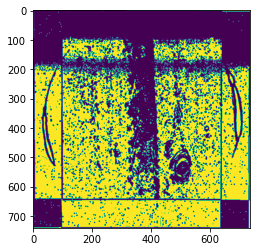

In [32]:
im0 = fits.open(im_names[0])['SCI'].data#fits.getdata(im_names[0])
im0_mask = im0==0
plt.imshow(im0_mask)

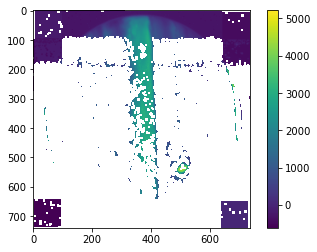

In [33]:
im0[im0_mask] = np.nan
plt.imshow(im0)
plt.colorbar()

In [34]:
get_fluxdensity(fits.open(im_names[0]))

<Quantity 9.33676246e-14 MJy>

In [35]:
flux1_F360M = ApertureStats(im0, apertures_0).sum * get_fluxdensity(fits.open(im_names[0]))/apertures_0.area_overlap(im0, mask=im0_mask)
flux1_F360M

<Quantity 1.11061666e-10 MJy>

In [36]:
flux1_eye_F360M = ApertureStats(im0, apertures_0_eye).sum * get_fluxdensity(fits.open(im_names[0]))/apertures_0_eye.area_overlap(im0, mask=im0_mask)
flux1_eye_F360M.to(u.Jy)

<Quantity 0.00012981 Jy>

In [37]:
flux1_stripe_F360M = ApertureStats(im0, apertures_0_stripe).sum * get_fluxdensity(fits.open(im_names[0]))/apertures_0_stripe.area_overlap(im0, mask=im0_mask)
flux1_stripe_F360M.to(u.Jy)

<Quantity 0.00020104 Jy>

In [38]:
flux1_band_F360M = ApertureStats(im0, apertures_0_band).sum * get_fluxdensity(fits.open(im_names[0]))/apertures_0_band.area_overlap(im0, mask=im0_mask)
flux1_band_F360M.to(u.Jy)

<Quantity 6.58110039e-05 Jy>

<ErrorbarContainer object of 3 artists>

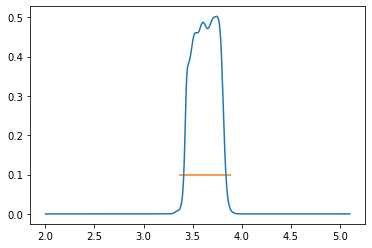

In [39]:
filter_F360M = ascii.read('https://jwst-docs.stsci.edu/files/97978094/97978131/1/1596073152859/F360M_NRC_and_OTE_ModAB_mean.txt')
plt.plot(filter_F360M['microns'], filter_F360M['throughput'])
mas_F360M = filter_F360M['microns'][filter_F360M['throughput']>0.01]
F360M_med = np.median(mas_F360M)
F360M_wid = (np.max(mas_F360M) - np.min(mas_F360M))/2
plt.errorbar(F360M_med, 0.1, xerr=F360M_wid)

F150W2


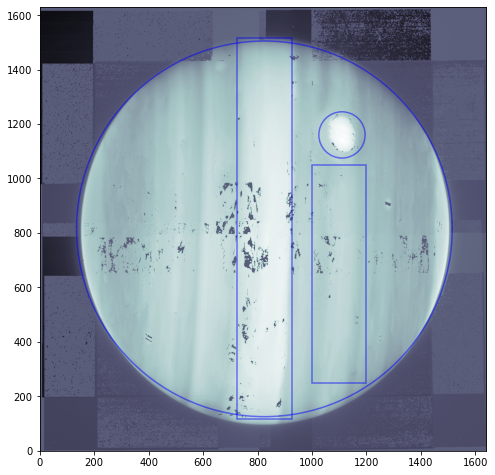

In [40]:
display_im(im_names[1])
apertures_1 = CircularAperture((825, 815), r=690.)  
apertures_1.plot(color='blue', lw=1.5, alpha=0.5)

apertures_1_eye = CircularAperture((1110, 1160), r=85.)
apertures_1_eye.plot(color='blue', lw=1.5, alpha=0.5)

apertures_1_stripe = RectangularAperture((825, 815), w=200, h=1400)
apertures_1_stripe.plot(color='blue', lw=1.5, alpha=0.5)

apertures_1_band = RectangularAperture((1100, 650), w=200, h=800)
apertures_1_band.plot(color='blue', lw=1.5, alpha=0.5)
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/aperture_selection.pdf', bbox_inches="tight")

<Quantity 7.5177079e-10 MJy>

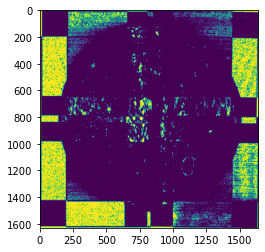

In [41]:
im1 = fits.getdata(im_names[1])
im1_mask = im1==0
im1[im1_mask] = np.nan
plt.imshow(im1_mask)
flux1_F150W2 = ApertureStats(im1, apertures_1).sum * get_fluxdensity(fits.open(im_names[1]))/apertures_1.area_overlap(im1, mask=im1_mask)
flux1_F150W2

In [42]:
flux1_eye_F150W2 = ApertureStats(im1, apertures_1_eye).sum * get_fluxdensity(fits.open(im_names[1]))/apertures_1_eye.area_overlap(im1, mask=im1_mask)
flux1_eye_F150W2

<Quantity 1.37174153e-09 MJy>

In [43]:
flux1_stripe_F150W2 = ApertureStats(im1, apertures_1_stripe).sum * get_fluxdensity(fits.open(im_names[1]))/apertures_1_stripe.area_overlap(im1, mask=im1_mask)
flux1_stripe_F150W2

<Quantity 1.45644915e-09 MJy>

In [44]:
flux1_band_F150W2 = ApertureStats(im1, apertures_1_band).sum * get_fluxdensity(fits.open(im_names[1]))/apertures_1_band.area_overlap(im1, mask=im1_mask)
flux1_band_F150W2

<Quantity 7.11295998e-10 MJy>

In [45]:
#ApertureStats(im1, apertures_1).sum 
#apertures_0.area_overlap?

<ErrorbarContainer object of 3 artists>

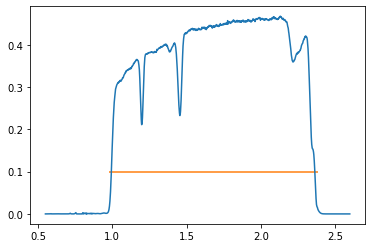

In [46]:
filter_F150W2 = ascii.read('https://jwst-docs.stsci.edu/files/97978094/97978110/1/1596073152322/F150W2_NRC_and_OTE_ModAB_mean.txt')
plt.plot(filter_F150W2['microns'], filter_F150W2['throughput'])
mas_F150W2 = filter_F150W2['microns'][filter_F150W2['throughput']>0.01]
F150W2_med = np.median(mas_F150W2)
F150W2_wid = (np.max(mas_F150W2) - np.min(mas_F150W2))/2
plt.errorbar(F150W2_med, 0.1, xerr=F150W2_wid)

F360M


(<matplotlib.patches.Rectangle at 0x7efd02ca4730>,)

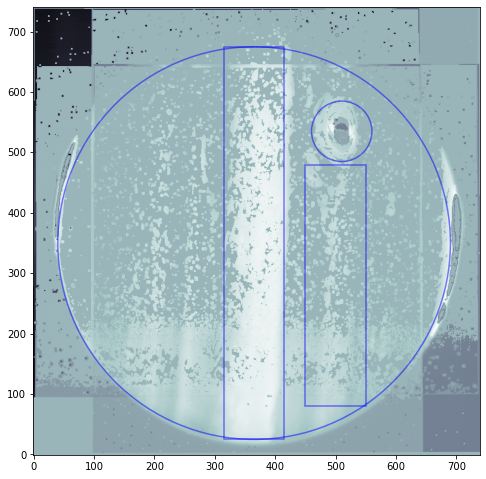

In [47]:
display_im(im_names[2])
apertures_2 = CircularAperture((365, 350), r=325.)  
apertures_2.plot(color='blue', lw=1.5, alpha=0.5)

apertures_2_eye = CircularAperture((510, 535), r=50.)
apertures_2_eye.plot(color='blue', lw=1.5, alpha=0.5)

apertures_2_stripe = RectangularAperture((365, 350), w=100, h=650)
apertures_2_stripe.plot(color='blue', lw=1.5, alpha=0.5)

apertures_2_band = RectangularAperture((500, 280), w=100, h=400)
apertures_2_band.plot(color='blue', lw=1.5, alpha=0.5)

<Quantity 9.79092088e-11 MJy>

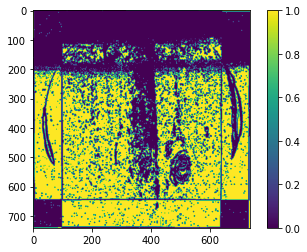

In [48]:
im2 = fits.getdata(im_names[2])
im2_mask = im2==0
im2[im2_mask] = np.nan
plt.imshow(im2_mask)
plt.colorbar()
flux2_F360M = ApertureStats(im2, apertures_2).sum * get_fluxdensity(fits.open(im_names[2]))/apertures_2.area_overlap(im2, mask=im2_mask)
flux2_F360M

In [49]:
flux2_eye_F360M = ApertureStats(im2, apertures_2_eye).sum * get_fluxdensity(fits.open(im_names[2]))/apertures_2_eye.area_overlap(im2, mask=im2_mask)
flux2_eye_F360M

<Quantity 6.89740089e-11 MJy>

In [50]:
flux2_stripe_F360M = ApertureStats(im2, apertures_2_stripe).sum * get_fluxdensity(fits.open(im_names[2]))/apertures_2_stripe.area_overlap(im2, mask=im2_mask)
flux2_stripe_F360M

<Quantity 1.82912586e-10 MJy>

In [51]:
flux2_band_F360M = ApertureStats(im2, apertures_2_band).sum * get_fluxdensity(fits.open(im_names[2]))/apertures_2_band.area_overlap(im2, mask=im2_mask)
flux2_band_F360M

<Quantity 6.21978353e-11 MJy>

F444W


(<matplotlib.patches.Rectangle at 0x7efd02a572b0>,)

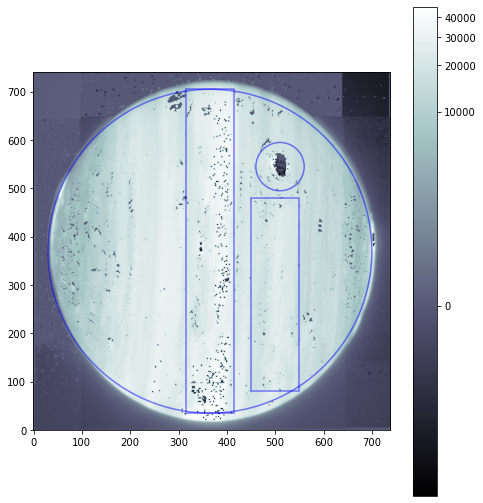

In [52]:
display_im(im_names[3])
plt.colorbar()
apertures_3 = CircularAperture((365, 370), r=335.)  
apertures_3.plot(color='blue', lw=1.5, alpha=0.5)

apertures_3_eye = CircularAperture((510, 545), r=50.)
apertures_3_eye.plot(color='blue', lw=1.5, alpha=0.5)

apertures_3_stripe = RectangularAperture((365, 370), w=100, h=670)
apertures_3_stripe.plot(color='blue', lw=1.5, alpha=0.5)

apertures_3_band = RectangularAperture((500, 280), w=100, h=400)
apertures_3_band.plot(color='blue', lw=1.5, alpha=0.5)

<ErrorbarContainer object of 3 artists>

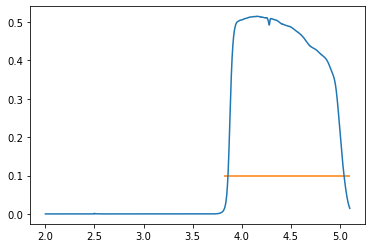

In [53]:
filter_F444W = ascii.read('https://jwst-docs.stsci.edu/files/97978094/97978127/1/1596073152777/F444W_NRC_and_OTE_ModAB_mean.txt')
plt.plot(filter_F444W['microns'], filter_F444W['throughput'])
mas_F444W = filter_F444W['microns'][filter_F444W['throughput']>0.01]
F444W_med = np.median(mas_F444W)
F444W_wid = (np.max(mas_F444W) - np.min(mas_F444W))/2
plt.errorbar(F444W_med, 0.1, xerr=F444W_wid)

<Quantity 1.81538334e-09 MJy>

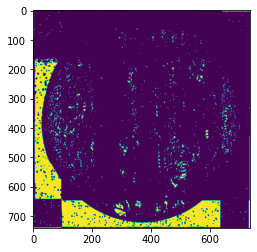

In [54]:
im3 = fits.getdata(im_names[3])
im3_mask = im3==0
im3[im3_mask] = np.nan
plt.imshow(im3_mask)
flux1_F444W = ApertureStats(im3, apertures_3).sum * get_fluxdensity(fits.open(im_names[3]))/apertures_3.area_overlap(im3, mask=im3_mask)
flux1_F444W

In [55]:
flux1_eye_F444W = ApertureStats(im3, apertures_3_eye).sum * get_fluxdensity(fits.open(im_names[3]))/apertures_3_eye.area_overlap(im3, mask=im3_mask)
flux1_eye_F444W

<Quantity 1.60961823e-09 MJy>

In [56]:
flux1_stripe_F444W = ApertureStats(im3, apertures_3_stripe).sum * get_fluxdensity(fits.open(im_names[3]))/apertures_3_stripe.area_overlap(im3, mask=im3_mask)
flux1_stripe_F444W

<Quantity 2.45608243e-09 MJy>

In [57]:
flux1_band_F444W = ApertureStats(im3, apertures_3_band).sum * get_fluxdensity(fits.open(im_names[3]))/apertures_3_band.area_overlap(im3, mask=im3_mask)
flux1_band_F444W

<Quantity 1.95998643e-09 MJy>

In [58]:
ApertureStats(im3, apertures_3).sum

6668343091.711399

F212N


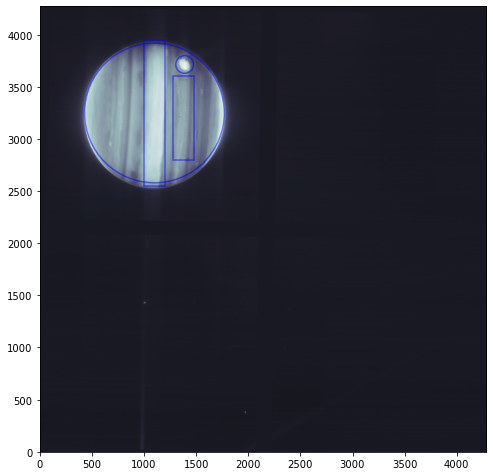

In [59]:
display_im(im_names[4])
#display_cutout(im_names[4], 200, 2250, 2000, 4200)
apertures_4 = CircularAperture((1100, 3250), r=670.)  
apertures_4.plot(color='blue', lw=1.5, alpha=0.5)

apertures_4_eye = CircularAperture((1390, 3715), r=85.)
apertures_4_eye.plot(color='blue', lw=1.5, alpha=0.5)

apertures_4_stripe = RectangularAperture((1100, 3250), w=200, h=1400)
apertures_4_stripe.plot(color='blue', lw=1.5, alpha=0.5)

apertures_4_band = RectangularAperture((1380, 3200), w=200, h=800)
apertures_4_band.plot(color='blue', lw=1.5, alpha=0.5)
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/aperture_selection2.pdf', bbox_inches="tight")

<ErrorbarContainer object of 3 artists>

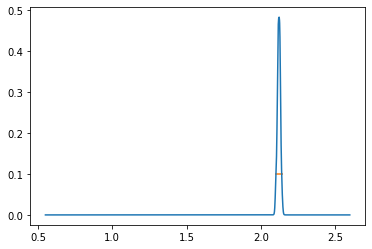

In [60]:
filter_F212N = ascii.read('https://jwst-docs.stsci.edu/files/97978094/97978114/1/1596073152438/F212N_NRC_and_OTE_ModAB_mean.txt')
plt.plot(filter_F212N['microns'], filter_F212N['throughput'])
mas_F212N = filter_F212N['microns'][filter_F212N['throughput']>0.01]
F212N_med = np.median(mas_F212N)
F212N_wid = (np.max(mas_F212N) - np.min(mas_F212N))/2
plt.errorbar(F212N_med, 0.1, xerr=F212N_wid)

In [61]:
apertures_4.area

1410260.942196458

<Quantity 0.00011434 Jy>

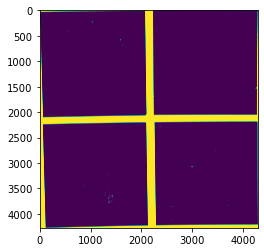

In [62]:
im4 = fits.getdata(im_names[4])
im4_mask = im4==0
im4[im4_mask] = np.nan
plt.imshow(im4_mask)
flux1_F212N = ApertureStats(im4, apertures_4).sum * get_fluxdensity(fits.open(im_names[4]))/apertures_4.area_overlap(im4, mask=im4_mask)
flux1_F212N.to(u.Jy)

In [63]:
flux1_eye_F212N = ApertureStats(im4, apertures_4_eye).sum * get_fluxdensity(fits.open(im_names[4]))/apertures_4_eye.area_overlap(im4, mask=im4_mask)
flux1_eye_F212N.to(u.Jy)

<Quantity 0.00018483 Jy>

In [64]:
flux1_stripe_F212N = ApertureStats(im4, apertures_4_stripe).sum * get_fluxdensity(fits.open(im_names[4]))/apertures_4_stripe.area_overlap(im4, mask=im4_mask)
flux1_stripe_F212N.to(u.Jy)

<Quantity 0.00024398 Jy>

In [65]:
flux1_band_F212N = ApertureStats(im4, apertures_4_band).sum * get_fluxdensity(fits.open(im_names[4]))/apertures_4_band.area_overlap(im4, mask=im4_mask)
flux1_band_F212N.to(u.Jy)

<Quantity 6.72991007e-05 Jy>

F335M


(<matplotlib.patches.Rectangle at 0x7efd02c15a90>,)

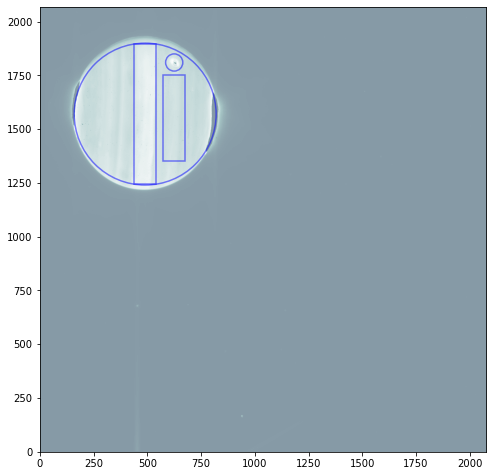

In [66]:
display_im(im_names[5])
#display_cutout(im_names[5], 100, 1100, 900, 2000)
apertures_5 = CircularAperture((490, 1570), r=330.)  
apertures_5.plot(color='blue', lw=1.5, alpha=0.5)

apertures_5_eye = CircularAperture((625, 1810), r=40.)
apertures_5_eye.plot(color='blue', lw=1.5, alpha=0.5)

apertures_5_stripe = RectangularAperture((490, 1570), w=100, h=650)
apertures_5_stripe.plot(color='blue', lw=1.5, alpha=0.5)

apertures_5_band = RectangularAperture((625, 1550), w=100, h=400)
apertures_5_band.plot(color='blue', lw=1.5, alpha=0.5)

<ErrorbarContainer object of 3 artists>

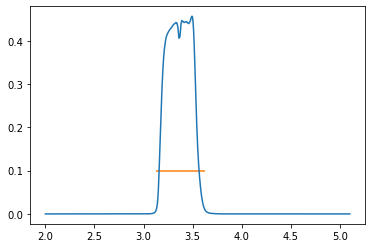

In [67]:
filter_F335M = ascii.read('https://jwst-docs.stsci.edu/files/97978094/97978120/1/1596073152586/F335M_NRC_and_OTE_ModAB_mean.txt')
plt.plot(filter_F335M['microns'], filter_F335M['throughput'])
mas_F335M = filter_F335M['microns'][filter_F335M['throughput']>0.01]
F335M_med = np.median(mas_F335M)
F335M_wid = (np.max(mas_F335M) - np.min(mas_F335M))/2
plt.errorbar(F335M_med, 0.1, xerr=F335M_wid)

<Quantity 6.11944067e-11 MJy>

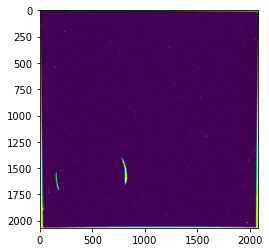

In [68]:
im5 = fits.getdata(im_names[5])
im5_mask = im5==0
im5[im5_mask] = np.nan
plt.imshow(im5_mask)
flux1_F335M = ApertureStats(im5, apertures_5).sum * get_fluxdensity(fits.open(im_names[5]))/apertures_5.area_overlap(im5, mask=im5_mask)
flux1_F335M

In [69]:
flux1_eye_F335M = ApertureStats(im5, apertures_5_eye).sum * get_fluxdensity(fits.open(im_names[5]))/apertures_5_eye.area_overlap(im5, mask=im5_mask)
flux1_eye_F335M

<Quantity 6.96776891e-11 MJy>

In [70]:
flux1_stripe_F335M = ApertureStats(im5, apertures_5_stripe).sum * get_fluxdensity(fits.open(im_names[5]))/apertures_5_stripe.area_overlap(im5, mask=im5_mask)
flux1_stripe_F335M

<Quantity 8.78908388e-11 MJy>

In [71]:
flux1_band_F335M = ApertureStats(im5, apertures_5_band).sum * get_fluxdensity(fits.open(im_names[5]))/apertures_5_band.area_overlap(im5, mask=im5_mask)
flux1_band_F335M

<Quantity 5.28466521e-11 MJy>

F212N


(<matplotlib.patches.Rectangle at 0x7efcfe44f730>,)

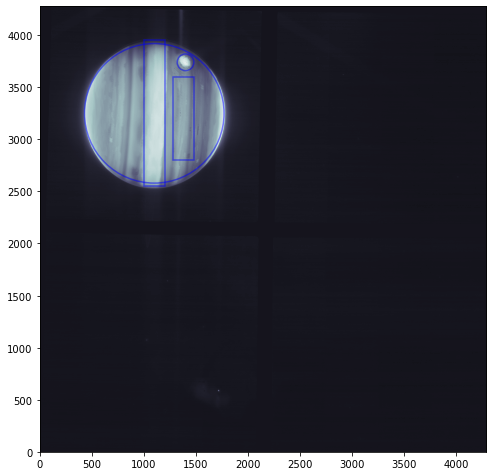

In [72]:
display_im(im_names[6])
#display_cutout(im_names[6], 200, 2250, 2000, 4200)
apertures_6 = CircularAperture((1100, 3250), r=670.)  
apertures_6.plot(color='blue', lw=1.5, alpha=0.5)

apertures_6_eye = CircularAperture((1400, 3740), r=80.)
apertures_6_eye.plot(color='blue', lw=1.5, alpha=0.5)

apertures_6_stripe = RectangularAperture((1100, 3250), w=200, h=1400)
apertures_6_stripe.plot(color='blue', lw=1.5, alpha=0.5)

apertures_6_band = RectangularAperture((1380, 3200), w=200, h=800)
apertures_6_band.plot(color='blue', lw=1.5, alpha=0.5)

<Quantity 1.14359448e-10 MJy>

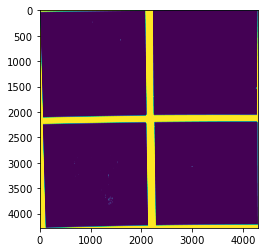

In [73]:
im6 = fits.getdata(im_names[6])
im6_mask = im6==0
im6[im6_mask] = np.nan
plt.imshow(im6_mask)
flux2_F212N = ApertureStats(im6, apertures_6).sum * get_fluxdensity(fits.open(im_names[6]))/apertures_6.area_overlap(im6, mask=im6_mask)
flux2_F212N

In [74]:
flux2_eye_F212N = ApertureStats(im6, apertures_6_eye).sum * get_fluxdensity(fits.open(im_names[6]))/apertures_6_eye.area_overlap(im6, mask=im6_mask)
flux2_eye_F212N

<Quantity 1.59173342e-10 MJy>

In [75]:
flux2_stripe_F212N = ApertureStats(im6, apertures_6_stripe).sum * get_fluxdensity(fits.open(im_names[6]))/apertures_6_stripe.area_overlap(im6, mask=im6_mask)
flux2_stripe_F212N

<Quantity 2.43617924e-10 MJy>

In [76]:
flux2_band_F212N = ApertureStats(im6, apertures_6_band).sum * get_fluxdensity(fits.open(im_names[6]))/apertures_6_band.area_overlap(im6, mask=im6_mask)
flux2_band_F212N

<Quantity 6.91046684e-11 MJy>

F335M


(<matplotlib.patches.Rectangle at 0x7efd027cb640>,)

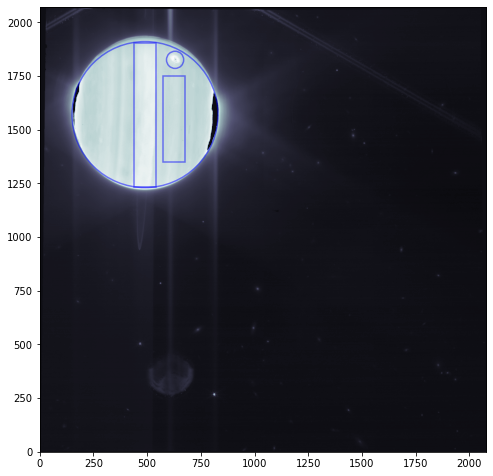

In [77]:
display_im(im_names[7])
#display_cutout(im_names[7], 100, 1100, 900, 2000)
apertures_7 = CircularAperture((490, 1570), r=340.)  
apertures_7.plot(color='blue', lw=1.5, alpha=0.5)

apertures_7_eye = CircularAperture((630, 1825), r=40.)
apertures_7_eye.plot(color='blue', lw=1.5, alpha=0.5)

apertures_7_stripe = RectangularAperture((490, 1570), w=100, h=670)
apertures_7_stripe.plot(color='blue', lw=1.5, alpha=0.5)

apertures_7_band = RectangularAperture((625, 1550), w=100, h=400)
apertures_7_band.plot(color='blue', lw=1.5, alpha=0.5)

<Quantity 6.08319207e-11 MJy>

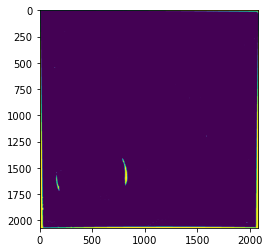

In [78]:
im7 = fits.getdata(im_names[7])
im7_mask = im7==0
im7[im7_mask] = np.nan
plt.imshow(im7_mask)
flux2_F335M = ApertureStats(im7, apertures_7).sum * get_fluxdensity(fits.open(im_names[7]))/apertures_7.area_overlap(im7, mask=im7_mask)
flux2_F335M

In [79]:
flux2_eye_F335M = ApertureStats(im7, apertures_7_eye).sum * get_fluxdensity(fits.open(im_names[7]))/apertures_7_eye.area_overlap(im7, mask=im7_mask)
flux2_eye_F335M

<Quantity 6.95357314e-11 MJy>

In [80]:
flux2_stripe_F335M = ApertureStats(im7, apertures_7_stripe).sum * get_fluxdensity(fits.open(im_names[7]))/apertures_7_stripe.area_overlap(im7, mask=im7_mask)
flux2_stripe_F335M

<Quantity 8.74851291e-11 MJy>

In [81]:
flux2_band_F335M = ApertureStats(im7, apertures_7_band).sum * get_fluxdensity(fits.open(im_names[7]))/apertures_7_band.area_overlap(im7, mask=im7_mask)
flux2_band_F335M

<Quantity 5.34314476e-11 MJy>

- F150W2

- F212N

- F335M

- F360M

- F444W


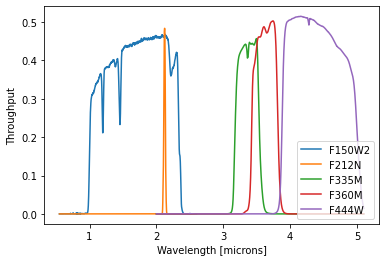

In [82]:
plt.plot(filter_F150W2['microns'], filter_F150W2['throughput'], label='F150W2')
plt.plot(filter_F212N['microns'], filter_F212N['throughput'], label='F212N')
plt.plot(filter_F335M['microns'], filter_F335M['throughput'], label='F335M')
plt.plot(filter_F360M['microns'], filter_F360M['throughput'], label='F360M')
plt.plot(filter_F444W['microns'], filter_F444W['throughput'], label='F444W')
plt.xlabel('Wavelength [microns]')
plt.ylabel('Throughput')
plt.legend(loc='lower right')
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/filters.pdf', bbox_inches="tight")

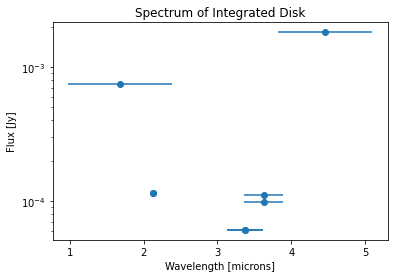

In [83]:
from astropy.visualization import quantity_support

waves = [F150W2_med, F212N_med, F335M_med, F360M_med, F444W_med, F212N_med, F335M_med, F360M_med]#*u.micron
fluxes = [flux1_F150W2.to(u.Jy).value, flux1_F212N.to(u.Jy).value, flux1_F335M.to(u.Jy).value, flux1_F360M.to(u.Jy).value, flux1_F444W.to(u.Jy).value, flux2_F212N.to(u.Jy).value, flux2_F335M.to(u.Jy).value, flux2_F360M.to(u.Jy).value]
errs = [F150W2_wid, F212N_wid, F335M_wid, F360M_wid, F444W_wid, F212N_wid, F335M_wid, F360M_wid]#*u.micron

with quantity_support():
    plt.errorbar(x=waves, y=fluxes, xerr=errs, fmt="o")
#plt.errorbar(x=F150W2_med, y=flux1_F150W2.value, xerr=(F150W2_max-F150W2_min)/2)
#plt.errorbar(x=F212N_med, y=flux1_F212N.value, xerr=(F212N_max-F212N_min)/2)
plt.xlabel('Wavelength [microns]')
plt.ylabel('Flux [Jy]')
plt.yscale('log')
plt.title('Spectrum of Integrated Disk')
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/spectra/integrated_disk.pdf', bbox_inches="tight")

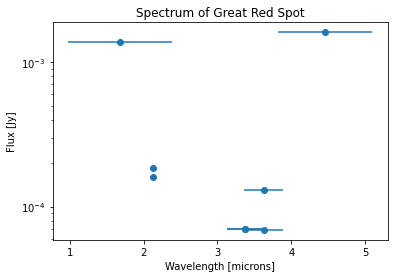

In [84]:
#waves = [F150W2_med, F212N_med, F335M_med, F360M_med, F444W_med, F212N_med, F335M_med, F360M_med]#*u.micron
fluxes = [flux1_eye_F150W2.to(u.Jy).value, flux1_eye_F212N.to(u.Jy).value, flux1_eye_F335M.to(u.Jy).value, flux1_eye_F360M.to(u.Jy).value, 
          flux1_eye_F444W.to(u.Jy).value, flux2_eye_F212N.to(u.Jy).value, flux2_eye_F335M.to(u.Jy).value, flux2_eye_F360M.to(u.Jy).value]
#errs = [F150W2_wid, F212N_wid, F335M_wid, F360M_wid, F444W_wid, F212N_wid, F335M_wid, F360M_wid]#*u.micron

with quantity_support():
    plt.errorbar(x=waves, y=fluxes, xerr=errs, fmt="o")
#plt.errorbar(x=F150W2_med, y=flux1_F150W2.value, xerr=(F150W2_max-F150W2_min)/2)
#plt.errorbar(x=F212N_med, y=flux1_F212N.value, xerr=(F212N_max-F212N_min)/2)
plt.xlabel('Wavelength [microns]')
plt.ylabel('Flux [Jy]')
plt.yscale('log')
plt.title('Spectrum of Great Red Spot')
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/spectra/great_red_spot.pdf', bbox_inches="tight")

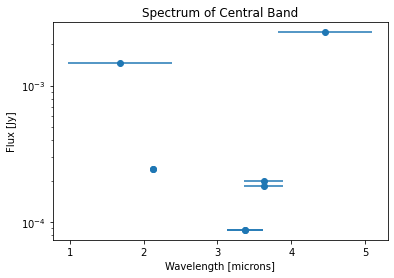

In [85]:
#waves = [F150W2_med, F212N_med, F335M_med, F360M_med, F444W_med, F212N_med, F335M_med, F360M_med]#*u.micron
fluxes = [flux1_stripe_F150W2.to(u.Jy).value, flux1_stripe_F212N.to(u.Jy).value, flux1_stripe_F335M.to(u.Jy).value, flux1_stripe_F360M.to(u.Jy).value, 
          flux1_stripe_F444W.to(u.Jy).value, flux2_stripe_F212N.to(u.Jy).value, flux2_stripe_F335M.to(u.Jy).value, flux2_stripe_F360M.to(u.Jy).value]
#errs = [F150W2_wid, F212N_wid, F335M_wid, F360M_wid, F444W_wid, F212N_wid, F335M_wid, F360M_wid]#*u.micron

with quantity_support():
    plt.errorbar(x=waves, y=fluxes, xerr=errs, fmt="o")
#plt.errorbar(x=F150W2_med, y=flux1_F150W2.value, xerr=(F150W2_max-F150W2_min)/2)
#plt.errorbar(x=F212N_med, y=flux1_F212N.value, xerr=(F212N_max-F212N_min)/2)
plt.xlabel('Wavelength [microns]')
plt.ylabel('Flux [Jy]')
plt.yscale('log')
plt.title('Spectrum of Central Band')
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/spectra/central_band.pdf', bbox_inches="tight")

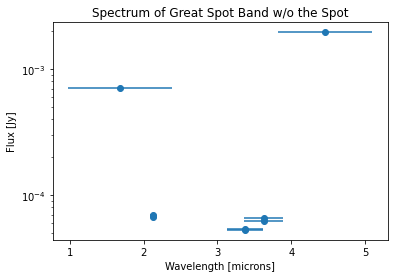

In [102]:
#waves = [F150W2_med, F212N_med, F335M_med, F360M_med, F444W_med, F212N_med, F335M_med, F360M_med]#*u.micron
fluxes = [flux1_band_F150W2.to(u.Jy).value, flux1_band_F212N.to(u.Jy).value, flux1_band_F335M.to(u.Jy).value, flux1_band_F360M.to(u.Jy).value, 
          flux1_band_F444W.to(u.Jy).value, flux2_band_F212N.to(u.Jy).value, flux2_band_F335M.to(u.Jy).value, flux2_band_F360M.to(u.Jy).value]
#errs = [F150W2_wid, F212N_wid, F335M_wid, F360M_wid, F444W_wid, F212N_wid, F335M_wid, F360M_wid]#*u.micron

with quantity_support():
    plt.errorbar(x=waves, y=fluxes, xerr=errs, fmt="o")
#plt.errorbar(x=F150W2_med, y=flux1_F150W2.value, xerr=(F150W2_max-F150W2_min)/2)
#plt.errorbar(x=F212N_med, y=flux1_F212N.value, xerr=(F212N_max-F212N_min)/2)
plt.xlabel('Wavelength [microns]')
plt.ylabel('Flux [Jy]')
plt.yscale('log')
plt.title('Spectrum of Great Spot Band w/o the Spot')
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/spectra/band.pdf', bbox_inches="tight")

In [87]:
reg_file = '/home/savannahgramze/Documents/ObsAstronomy/ObsData/LabFourData/JWST_Jupiter/JWST_Jupiter/jw01373-o009_t006_nircam_clear-f335m/ds9.reg'
reg = Regions.read(reg_file, format='ds9')
ro = reg[0]
ro

<EllipseSkyRegion(center=<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (8.42459833, 2.104425)>, width=2.268 arcsec, height=3.108 arcsec, angle=278.61783 deg)>

Set DATE-AVG to '2022-07-27T20:58:37.560' from MJD-AVG.
Set DATE-END to '2022-07-27T21:02:55.280' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -35.824855 from OBSGEO-[XYZ].
Set OBSGEO-H to 1712205664.514 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(<matplotlib.patches.Ellipse at 0x7efd0264e6d0>,)

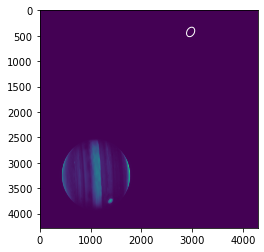

In [88]:
hdu_F212N = fits.open(im_names[6])
head = hdu_F212N['SCI'].header
ww = wcs.WCS(head)
preg = ro.to_pixel(ww)
mask = preg.to_mask()
dat = hdu_F212N['SCI'].data
cutout_F212N = mask.cutout(dat)
aper_F212N = SkyEllipticalAperture(ro.center, ro.height, ro.width, ro.angle).to_pixel(ww)

fig, ax = plt.subplots()
plt.imshow(dat)
#plt.imshow(cutout_F212N)
aper_F212N.plot(color='white')

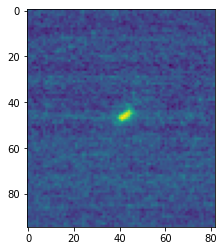

In [89]:
plt.imshow(cutout_F212N)
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/galaxy/galaxy_F212N.pdf', bbox_inches="tight")

In [90]:
flux_gal_F212N = ApertureStats(hdu_F212N['SCI'].data, 
                               aper_F212N).sum * get_fluxdensity(fits.open(im_names[6]))/aper_F212N.area_overlap(hdu_F212N['SCI'].data)
flux_gal_F212N

<Quantity 2.1949377e-14 MJy>

Set DATE-AVG to '2022-07-27T20:58:37.534' from MJD-AVG.
Set DATE-END to '2022-07-27T21:02:55.216' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -35.823423 from OBSGEO-[XYZ].
Set OBSGEO-H to 1712191132.368 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(<matplotlib.patches.Ellipse at 0x7efd0239c640>,)

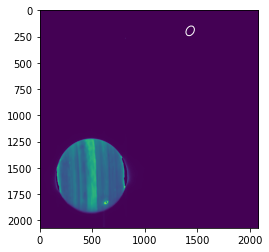

In [91]:
hdu_F335M = fits.open(im_names[7])
head = hdu_F335M['SCI'].header
ww = wcs.WCS(head)
preg = ro.to_pixel(ww)
mask = preg.to_mask()
dat = hdu_F335M['SCI'].data
cutout_F335M = mask.cutout(hdu_F335M['SCI'].data)

aper_F335M = SkyEllipticalAperture(ro.center, ro.height, ro.width, ro.angle).to_pixel(ww)

fig, ax = plt.subplots()
#plt.subplot(111)
plt.imshow(dat)
#plt.imshow(cutout_F212N)
aper_F335M.plot(color='white')
#plt.imshow(cutout_F335M)



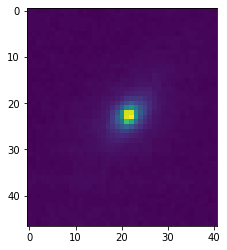

In [92]:
plt.imshow(cutout_F335M)
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/galaxy/galaxy_F335M.pdf', bbox_inches="tight")

In [93]:
flux_gal_F335M = ApertureStats(hdu_F335M['SCI'].data, 
                               aper_F335M).sum * get_fluxdensity(fits.open(im_names[7]))/aper_F335M.area_overlap(hdu_F335M['SCI'].data)
flux_gal_F335M

<Quantity 1.37363441e-14 MJy>

Not the most impressive spectrum


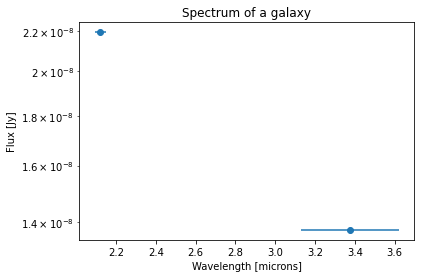

In [103]:
fluxes = [flux_gal_F212N.to(u.Jy).value, flux_gal_F335M.to(u.Jy).value]
wavelengths = [F212N_med, F335M_med]
errors = [F212N_wid, F335M_wid]

with quantity_support():
    plt.errorbar(x=wavelengths, y=fluxes, xerr=errors, fmt="o")
#plt.errorbar(x=F150W2_med, y=flux1_F150W2.value, xerr=(F150W2_max-F150W2_min)/2)
#plt.errorbar(x=F212N_med, y=flux1_F212N.value, xerr=(F212N_max-F212N_min)/2)
plt.xlabel('Wavelength [microns]')
plt.ylabel('Flux [Jy]')
plt.yscale('log')
plt.title('Spectrum of a galaxy')
print('Not the most impressive spectrum')
plt.savefig('/mnt/c/Users/panda/Documents/HomeworkBack/ObsTech/LabFour/plots/spectra/galaxy.pdf', bbox_inches="tight")